<h2><b>地震の深さとマグニチュードは関係あるの？</b></h2>

粟野翔







地震が起こったときに「震源の深さ○○m～」って言いますよね？

これと別に「マグニチュードは○○～」なんて言い方もされます。

ではこれらは関係あるのでしょうか？　それとも別々のもの？

では震源が深くなればなるほどマグニチュードが大きくなると予想しましょう。

本当にあっているか分析します！

では散布図を作っていきましょう。散布図はデータの関係性が視覚的に分かりやすいので使用しました。  

横軸が地震の深さ、縦軸がマグニチュードの大きさです。

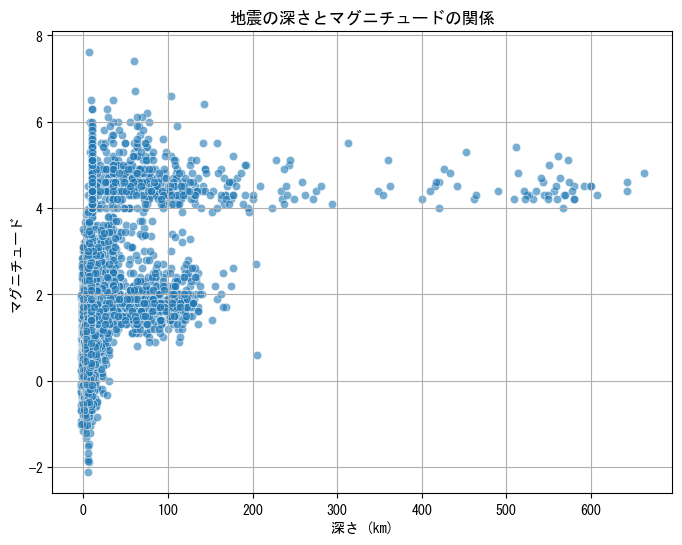

<h2><b>おお</b></h2>  

散布図から分かることは0~100ｍ地点で地震が多く発生しています。  
肝心の関係ですが0ｍ地点でもマグニチュード6以上の地震が発生しています。これにより  
震源が深くなればなるほどマグニチュードが大きくなるという仮説は間違っていると言えますね。  


しかし  
震源の深さが300ｍより深いところではマグニチュード4以上の地震しか発生していません。  
すこしは関係がありそうですね。

**数字で分析しよう！**  

今回はマグニチュードと深さの相関係数を調べます。


In [50]:
# セル 2: マグニチュードと深さの相関係数を計算
# 'mag' がマグニチュード, 'depth' が深さ（km）
corr = data['mag'].corr(data['depth'])
print(f"マグニチュードと深さの相関係数: {corr:.3f}")


マグニチュードと深さの相関係数: 0.388


実際に、震源の深さとマグニチュードの相関係数を求めたところ、値は 0.388 となりました。  

この結果は、震源が深くなるほどマグニチュードがやや大きくなる傾向があることを示しています。　　

ただし、0.4に満たない数値であるため、関係はそれほど強くなく、他の要因も影響していると考えられます。  

したがって、「震源の深さが大きいほど地震の規模も大きい」とは一概には言えませんが、一定の関連性があることは確かだと言えるでしょう。

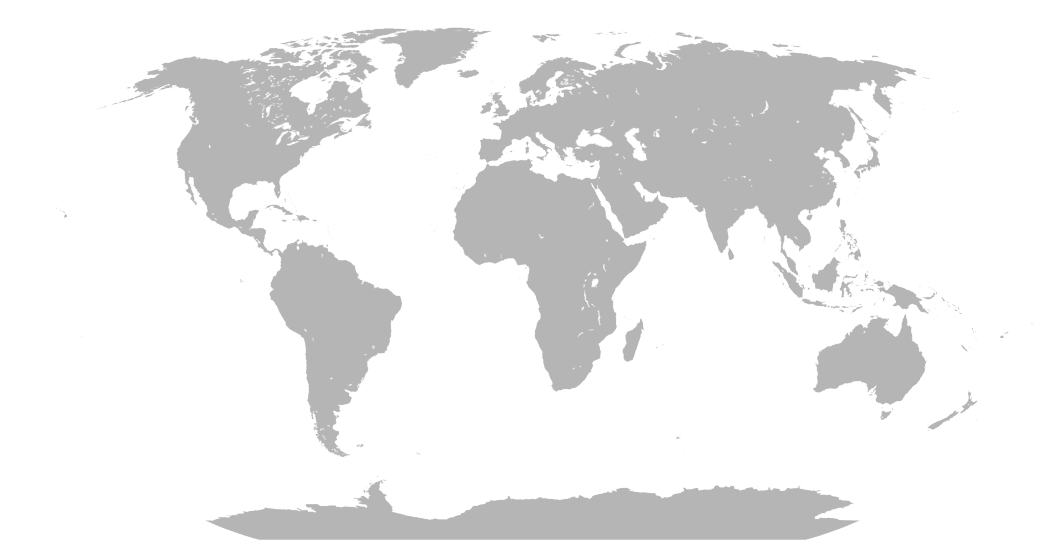

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 表示
plt.figure(figsize=(14,7))
plt.imshow(img)
plt.axis('off')  # 軸を非表示
plt.show()


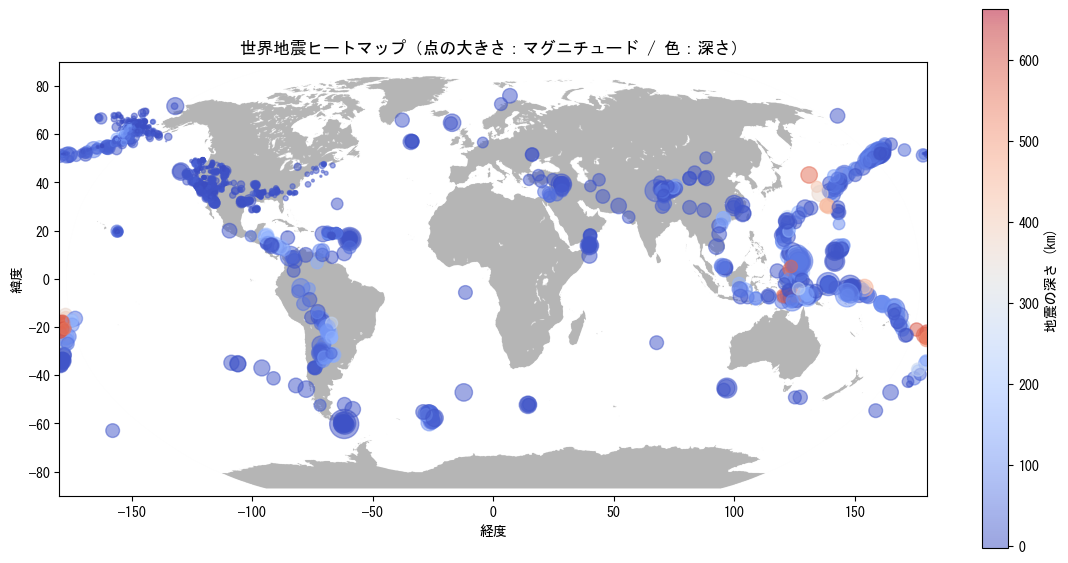

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さのデータ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)         # NaNを0に
depths = data['depth'].fillna(0)     # 深さもNaNを0に

# 点のサイズにマグニチュードを反映（強調したいので3乗）
sizes = mags**3

# 深さを色で表現（浅いほど赤、深いほど青）
colors = depths

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])  # 画像を緯度経度に合わせる
plt.scatter(lons, lats, s=sizes, c=colors, cmap='coolwarm', alpha=0.5)

plt.colorbar(label='地震の深さ (km)')
plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("世界地震ヒートマップ（点の大きさ：マグニチュード / 色：深さ）")
plt.show()



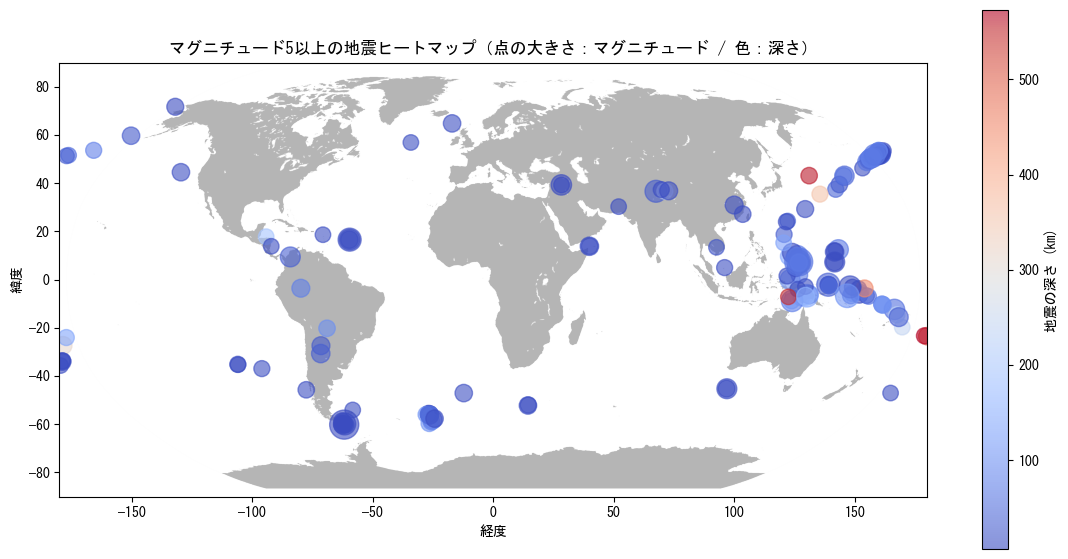

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 画像を読み込む
img = mpimg.imread('world_map.png')

# 緯度・経度・マグニチュード・深さ
lons = data['longitude']
lats = data['latitude']
mags = data['mag'].fillna(0)
depths = data['depth'].fillna(0)

# マグニチュード5以上のみ抽出
mask = mags >= 5
lons = lons[mask]
lats = lats[mask]
mags = mags[mask]
depths = depths[mask]

# 点のサイズにマグニチュードを反映（強調のため3乗）
sizes = mags**3

# 深さを色で表現（浅い赤～深い青）
colors = depths

plt.figure(figsize=(14,7))
plt.imshow(img, extent=[-180,180,-90,90])  # 画像を緯度経度に合わせる
plt.scatter(lons, lats, s=sizes, c=colors, cmap='coolwarm', alpha=0.6)

plt.colorbar(label='地震の深さ (km)')
plt.xlabel("経度")
plt.ylabel("緯度")
plt.title("マグニチュード5以上の地震ヒートマップ（点の大きさ：マグニチュード / 色：深さ）")
plt.show()


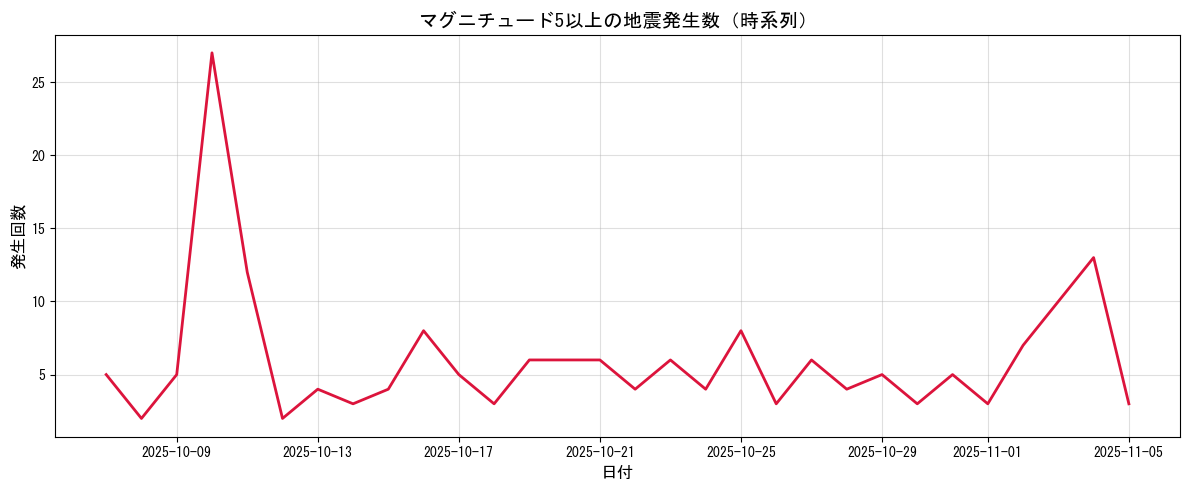

In [49]:
# セル: 時系列トレンド分析（マグニチュード5以上）

import pandas as pd
import matplotlib.pyplot as plt

# "time"列を日時型に変換
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# マグニチュード5以上を抽出
data_m5 = data[data['mag'] >= 5]

# 日ごとの地震回数を集計
trend = data_m5.groupby(data_m5['time'].dt.date).size()

# グラフ描画
plt.figure(figsize=(12, 5))
plt.plot(trend.index, trend.values, color='crimson', linewidth=2)
plt.title('マグニチュード5以上の地震発生数（時系列）', fontsize=14)
plt.xlabel('日付', fontsize=12)
plt.ylabel('発生回数', fontsize=12)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()
